Q2

Eigenvector Centrality

In [20]:
import networkx as nx
import pandas as pd

# Load graph
G = nx.read_graphml(r'B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml')

# Compute eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)

# Sort and display top 10 nodes
top_10 = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame for neat output
df_top10 = pd.DataFrame(top_10, columns=["Port", "Eigenvector Centrality"])
print(df_top10)


                                      Port  Eigenvector Centrality
0                     Singapore, Singapore                0.208836
1                 Republic of Korea, Busan                0.205705
2                            China, Ningbo                0.186291
3                          China, Shanghai                0.186291
4                     Malaysia, Port Klang                0.185983
5  Netherlands (Kingdom of the), Rotterdam                0.178984
6                         Belgium, Antwerp                0.175912
7          China, Hong Kong SAR, Hong Kong                0.170056
8                           China, Qingdao                0.169503
9                            China, Shekou                0.169503


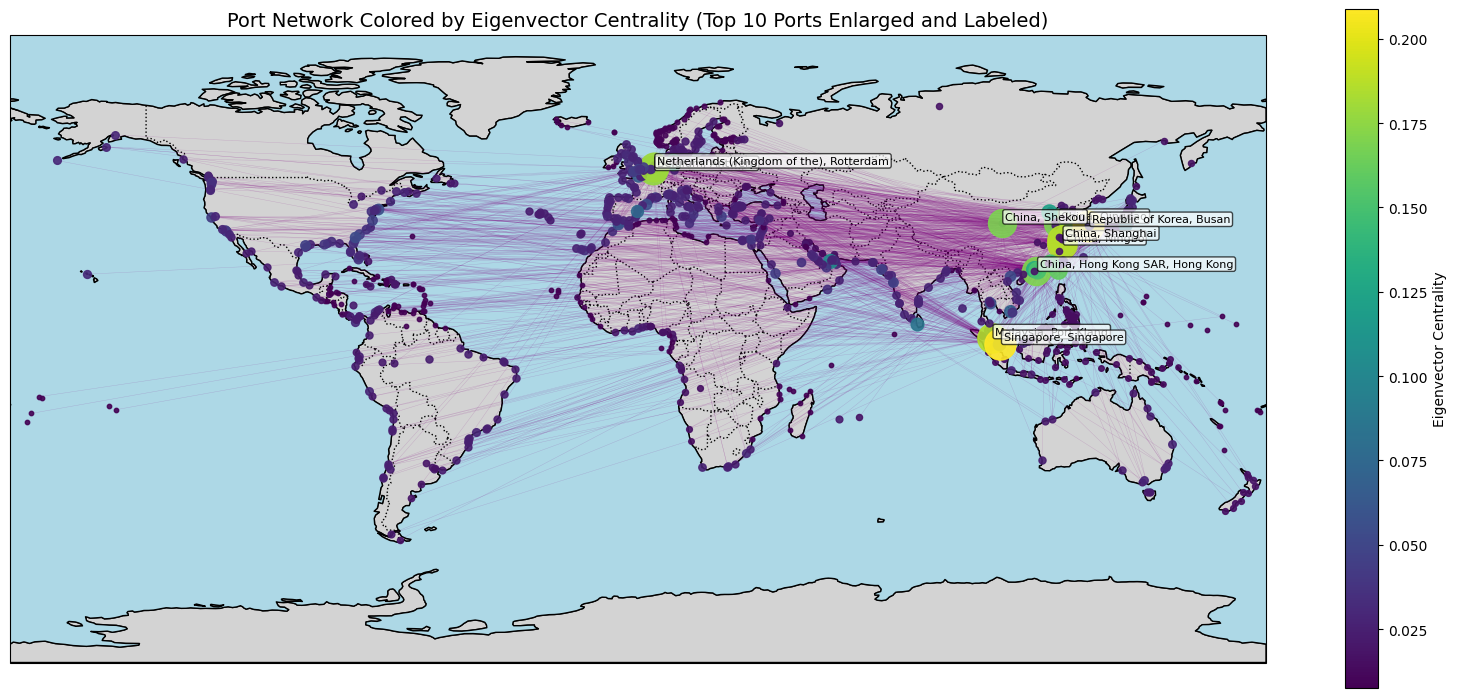

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

# Load GraphML file
graphml_file = r"B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml"
G = nx.read_graphml(graphml_file)

# Get node positions
node_positions = {}
for node, data in G.nodes(data=True):
    lat = data.get('latitude')
    lon = data.get('longitude')
    if lat and lon:
        node_positions[node] = (float(lon), float(lat))

# Eigenvector centrality
eigen_centrality = nx.eigenvector_centrality_numpy(G)

# Normalize centrality for color/size
min_centrality = min(eigen_centrality.values())
max_centrality = max(eigen_centrality.values())

# Color map
cmap = cm.viridis
norm = mcolors.Normalize(vmin=min_centrality, vmax=max_centrality)

# Size normalization function
def normalize_size(val, boost=False):
    base_size = 10 + (val - min_centrality) / (max_centrality - min_centrality) * (200 - 10)
    return base_size * 2.5 if boost else base_size  # Boost for top 10

# Subset of edges to avoid clutter
filtered_edges = [edge for edge in G.edges() if random.random() < 0.1]

# Top 10 nodes by eigenvector centrality
top_10 = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_nodes = [node for node, _ in top_10]

# Plot setup
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot edges
for u, v in filtered_edges:
    if u in node_positions and v in node_positions:
        lon1, lat1 = node_positions[u]
        lon2, lat2 = node_positions[v]
        ax.plot([lon1, lon2], [lat1, lat2], color='purple', linewidth=0.3, alpha=0.2)

# Plot nodes
for node, (lon, lat) in node_positions.items():
    centrality = eigen_centrality.get(node, 0)
    is_top_10 = node in top_10_nodes
    ax.scatter(
        lon, lat,
        s=normalize_size(centrality, boost=is_top_10),
        color=cmap(norm(centrality)),
        alpha=0.9,
        transform=ccrs.PlateCarree(),
        zorder=5
    )

    if is_top_10:
        ax.text(
            lon + 1, lat + 1, node,
            fontsize=8,
            transform=ccrs.PlateCarree(),
            zorder=6,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7)
        )

# Title and colorbar
plt.title("Port Network Colored by Eigenvector Centrality (Top 10 Ports Enlarged and Labeled)", fontsize=14)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Eigenvector Centrality', fontsize=10)

plt.tight_layout()
plt.show()



Kartz Centrality

In [28]:
import networkx as nx
import pandas as pd

# Load graph
G = nx.read_graphml(r'B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml')

# Compute Katz centrality
# Adjust alpha and beta as needed; here alpha is set to 0.005 and beta to 1.0.
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-06)

# Sort and display top 10 nodes
top_10_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Create a DataFrame for neat output
df_top10_katz = pd.DataFrame(top_10_katz, columns=["Port", "Katz Centrality"])
print(df_top10_katz)


                                      Port  Katz Centrality
0                     Singapore, Singapore         0.157470
1                 Republic of Korea, Busan         0.155899
2                            China, Ningbo         0.146184
3                          China, Shanghai         0.146184
4                     Malaysia, Port Klang         0.128494
5  Netherlands (Kingdom of the), Rotterdam         0.123589
6          China, Hong Kong SAR, Hong Kong         0.121516
7                           China, Qingdao         0.120894
8                            China, Shekou         0.120894
9                         Belgium, Antwerp         0.118586


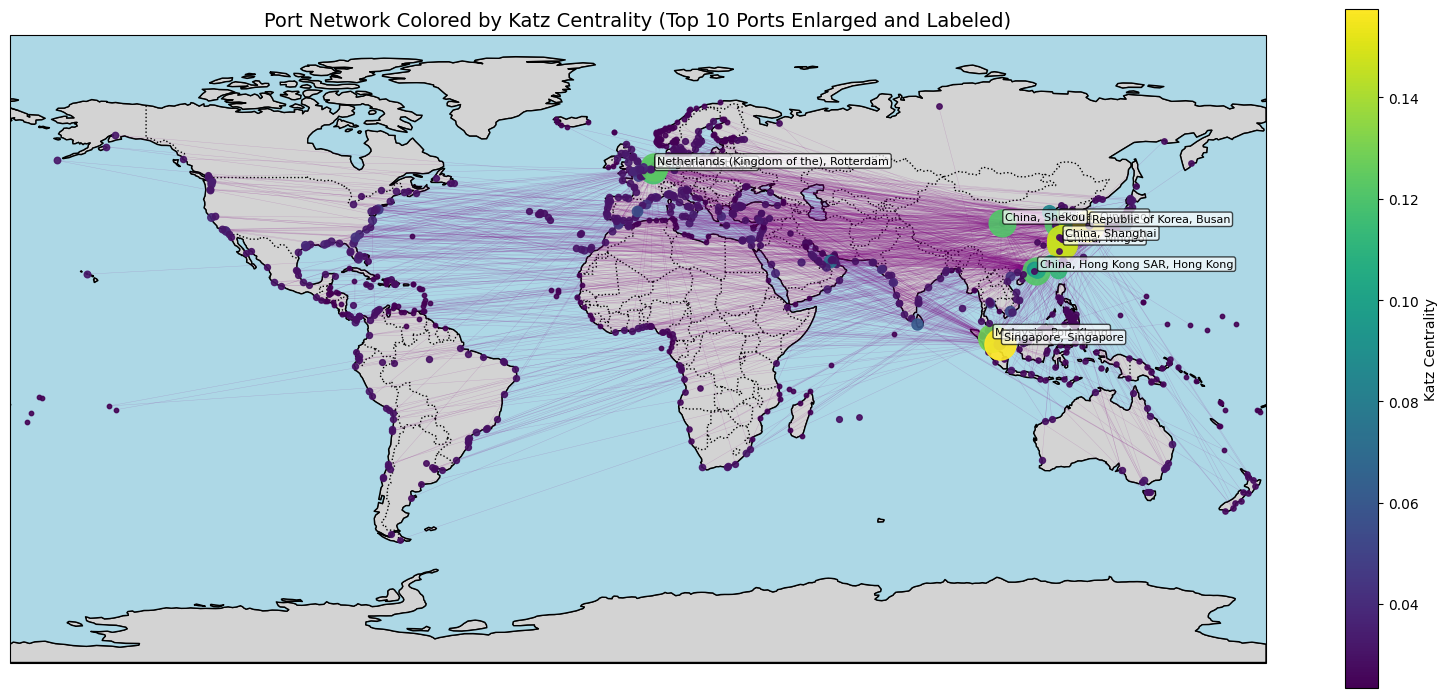

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

# Load GraphML file
graphml_file = r"B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml"
G = nx.read_graphml(graphml_file)

# Get node positions
node_positions = {}
for node, data in G.nodes(data=True):
    lat = data.get('latitude')
    lon = data.get('longitude')
    if lat and lon:
        node_positions[node] = (float(lon), float(lat))

# Katz centrality calculation
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-06)

# Normalize centrality for color/size
min_centrality = min(katz_centrality.values())
max_centrality = max(katz_centrality.values())

# Color map
cmap = cm.viridis
norm = mcolors.Normalize(vmin=min_centrality, vmax=max_centrality)

# Size normalization function
def normalize_size(val, boost=False):
    base_size = 10 + (val - min_centrality) / (max_centrality - min_centrality) * (200 - 10)
    return base_size * 2.5 if boost else base_size  # Boost for top 10

# Subset of edges to avoid clutter
filtered_edges = [edge for edge in G.edges() if random.random() < 0.1]

# Top 10 nodes by Katz centrality
top_10 = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_nodes = [node for node, _ in top_10]

# Plot setup
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot edges
for u, v in filtered_edges:
    if u in node_positions and v in node_positions:
        lon1, lat1 = node_positions[u]
        lon2, lat2 = node_positions[v]
        ax.plot([lon1, lon2], [lat1, lat2], color='purple', linewidth=0.3, alpha=0.2)

# Plot nodes
for node, (lon, lat) in node_positions.items():
    centrality = katz_centrality.get(node, 0)
    is_top_10 = node in top_10_nodes
    ax.scatter(
        lon, lat,
        s=normalize_size(centrality, boost=is_top_10),
        color=cmap(norm(centrality)),
        alpha=0.9,
        transform=ccrs.PlateCarree(),
        zorder=5
    )

    if is_top_10:
        ax.text(
            lon + 1, lat + 1, node,
            fontsize=8,
            transform=ccrs.PlateCarree(),
            zorder=6,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7)
        )

# Title and colorbar
plt.title("Port Network Colored by Katz Centrality (Top 10 Ports Enlarged and Labeled)", fontsize=14)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Katz Centrality', fontsize=10)

plt.tight_layout()
plt.show()


Betweenness Centrality

In [30]:
import networkx as nx
import pandas as pd

# Load graph
G = nx.read_graphml(r'B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml')

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Sort and display top 10 nodes
top_10 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Create DataFrame
df_top10 = pd.DataFrame(top_10, columns=["Port", "Betweenness Centrality"])
print(df_top10)


                                      Port  Betweenness Centrality
0                     Singapore, Singapore                0.157315
1                 Republic of Korea, Busan                0.154789
2                            China, Ningbo                0.133193
3                          China, Shanghai                0.133193
4                     Malaysia, Port Klang                0.050066
5  Netherlands (Kingdom of the), Rotterdam                0.048422
6          China, Hong Kong SAR, Hong Kong                0.042519
7                           China, Qingdao                0.041227
8                            China, Shekou                0.041227
9                         Belgium, Antwerp                0.033583


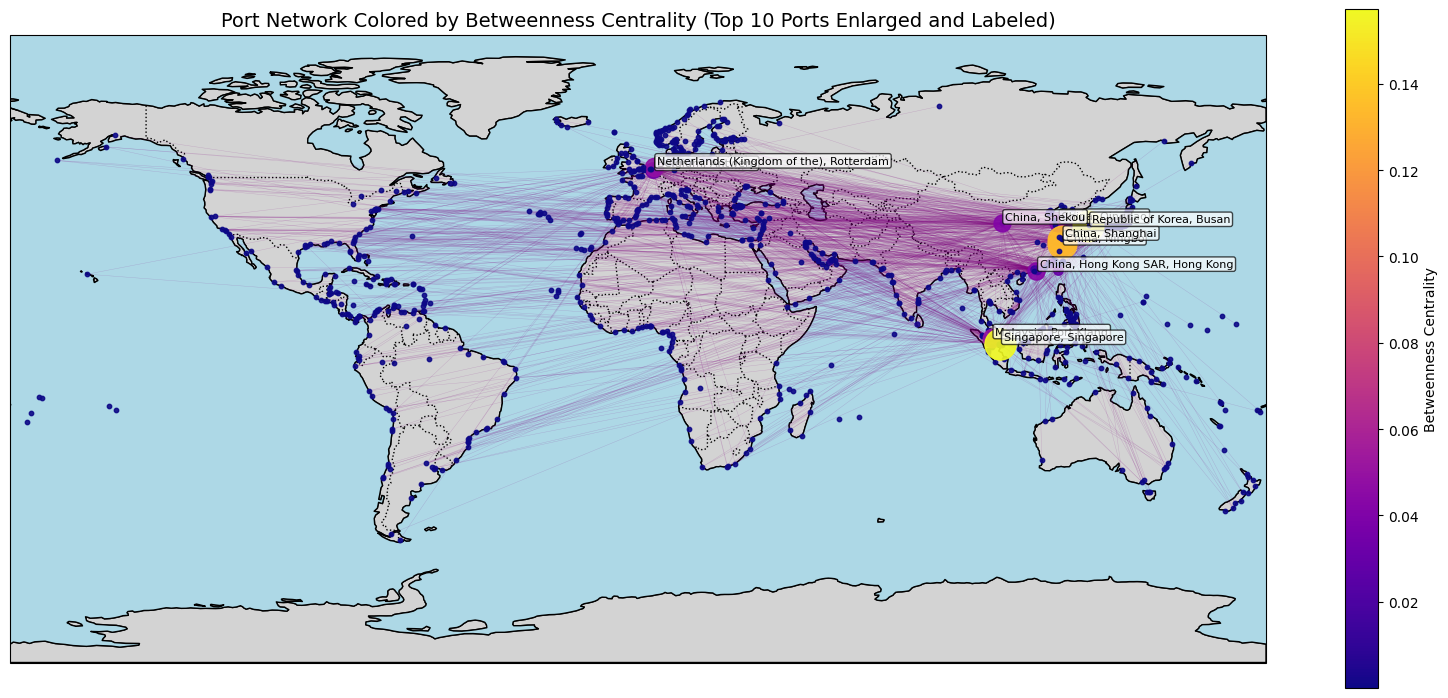

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

# Load GraphML file
graphml_file = r"B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml"
G = nx.read_graphml(graphml_file)

# Get node positions
node_positions = {}
for node, data in G.nodes(data=True):
    lat = data.get('latitude')
    lon = data.get('longitude')
    if lat and lon:
        node_positions[node] = (float(lon), float(lat))

# Compute betweenness centrality
bet_centrality = nx.betweenness_centrality(G, normalized=True)

# Normalize centrality for color/size
min_centrality = min(bet_centrality.values())
max_centrality = max(bet_centrality.values())

# Color map
cmap = cm.plasma
norm = mcolors.Normalize(vmin=min_centrality, vmax=max_centrality)

# Size normalization function
def normalize_size(val, boost=False):
    base_size = 10 + (val - min_centrality) / (max_centrality - min_centrality) * (200 - 10)
    return base_size * 2.5 if boost else base_size  # Boost for top 10

# Subset of edges to reduce clutter
filtered_edges = [edge for edge in G.edges() if random.random() < 0.1]

# Top 10 nodes by betweenness
top_10 = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_nodes = [node for node, _ in top_10]

# Plot setup
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot edges
for u, v in filtered_edges:
    if u in node_positions and v in node_positions:
        lon1, lat1 = node_positions[u]
        lon2, lat2 = node_positions[v]
        ax.plot([lon1, lon2], [lat1, lat2], color='purple', linewidth=0.3, alpha=0.2)

# Plot nodes
for node, (lon, lat) in node_positions.items():
    centrality = bet_centrality.get(node, 0)
    is_top_10 = node in top_10_nodes
    ax.scatter(
        lon, lat,
        s=normalize_size(centrality, boost=is_top_10),
        color=cmap(norm(centrality)),
        alpha=0.9,
        transform=ccrs.PlateCarree(),
        zorder=5
    )

    if is_top_10:
        ax.text(
            lon + 1, lat + 1, node,
            fontsize=8,
            transform=ccrs.PlateCarree(),
            zorder=6,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7)
        )

# Title and colorbar
plt.title("Port Network Colored by Betweenness Centrality (Top 10 Ports Enlarged and Labeled)", fontsize=14)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Betweenness Centrality', fontsize=10)

plt.tight_layout()
plt.show()


Closeness Centrality

In [33]:
import networkx as nx
import pandas as pd

# Load graph
G = nx.read_graphml(r'B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml')

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort and get top 10
top_10 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Create DataFrame
df_top10 = pd.DataFrame(top_10, columns=["Port", "Closeness Centrality"])
print(df_top10)


                                      Port  Closeness Centrality
0                     Singapore, Singapore              1.000000
1                 Republic of Korea, Busan              0.990175
2                            China, Ningbo              0.945777
3                          China, Shanghai              0.945777
4                     Malaysia, Port Klang              0.791449
5          China, Hong Kong SAR, Hong Kong              0.776541
6                           China, Qingdao              0.773231
7                            China, Shekou              0.773231
8  Netherlands (Kingdom of the), Rotterdam              0.767993
9                         Belgium, Antwerp              0.741013


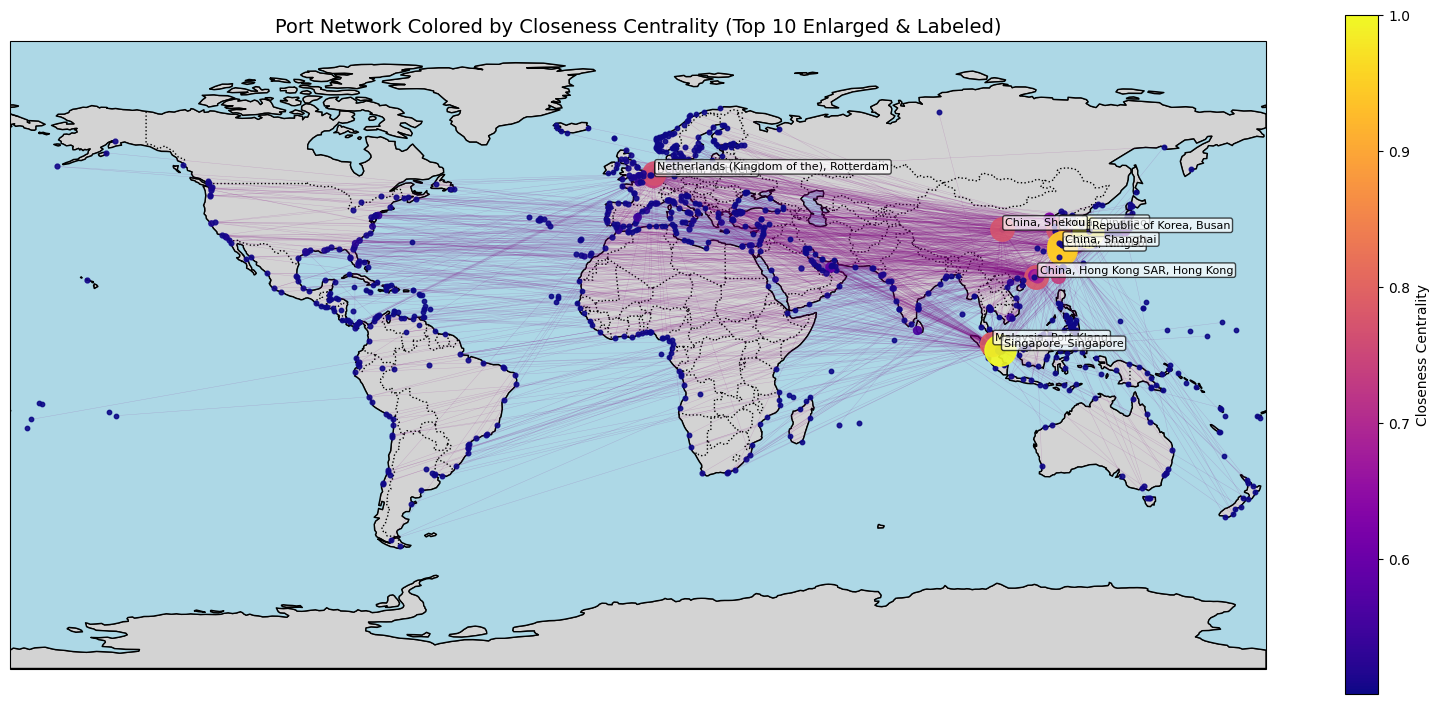

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

# Load GraphML file
G = nx.read_graphml(r"B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml")

# Node positions
node_positions = {}
for node, data in G.nodes(data=True):
    lat = data.get('latitude')
    lon = data.get('longitude')
    if lat and lon:
        node_positions[node] = (float(lon), float(lat))

# Closeness centrality
closeness = nx.closeness_centrality(G)

# Normalize values
min_c, max_c = min(closeness.values()), max(closeness.values())
cmap = cm.plasma
norm = mcolors.Normalize(vmin=min_c, vmax=max_c)

# Size normalization
def normalize_size(val, boost=False):
    base = 10 + (val - min_c) / (max_c - min_c) * (200 - 10)
    return base * 2.5 if boost else base

# Top 10 nodes
top_10 = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_nodes = [n for n, _ in top_10]

# Filter some edges
filtered_edges = [e for e in G.edges() if random.random() < 0.1]

# Plot
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Edges
for u, v in filtered_edges:
    if u in node_positions and v in node_positions:
        lon1, lat1 = node_positions[u]
        lon2, lat2 = node_positions[v]
        ax.plot([lon1, lon2], [lat1, lat2], color='purple', linewidth=0.3, alpha=0.2)

# Nodes
for node, (lon, lat) in node_positions.items():
    val = closeness.get(node, 0)
    top = node in top_10_nodes
    ax.scatter(
        lon, lat,
        s=normalize_size(val, boost=top),
        color=cmap(norm(val)),
        alpha=0.9,
        transform=ccrs.PlateCarree(),
        zorder=5
    )
    if top:
        ax.text(
            lon + 1, lat + 1, node,
            fontsize=8,
            transform=ccrs.PlateCarree(),
            zorder=6,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7)
        )

plt.title("Port Network Colored by Closeness Centrality (Top 10 Enlarged & Labeled)", fontsize=14)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Closeness Centrality', fontsize=10)

plt.tight_layout()
plt.show()


HITS

In [67]:
import networkx as nx
import pandas as pd

# Load the graph
G = nx.read_graphml(r'B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml')

# Compute HITS authority and hub scores
hits_scores = nx.hits(G, max_iter=1000, normalized=True)
authority_scores = hits_scores[1]  # [0] would give hub scores

# Sort and get top 10 by authority
top_10_authority = sorted(authority_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_top10_authority = pd.DataFrame(top_10_authority, columns=["Port", "HITS Authority Score"])
print(df_top10_authority)


                                      Port  HITS Authority Score
0                          China, Shanghai              0.014084
1                     Singapore, Singapore              0.013326
2                 Republic of Korea, Busan              0.011889
3                            China, Ningbo              0.011432
4          China, Hong Kong SAR, Hong Kong              0.009389
5                     Malaysia, Port Klang              0.008210
6                           China, Qingdao              0.007855
7  Netherlands (Kingdom of the), Rotterdam              0.007711
8                            China, Shekou              0.007480
9                         Belgium, Antwerp              0.007072


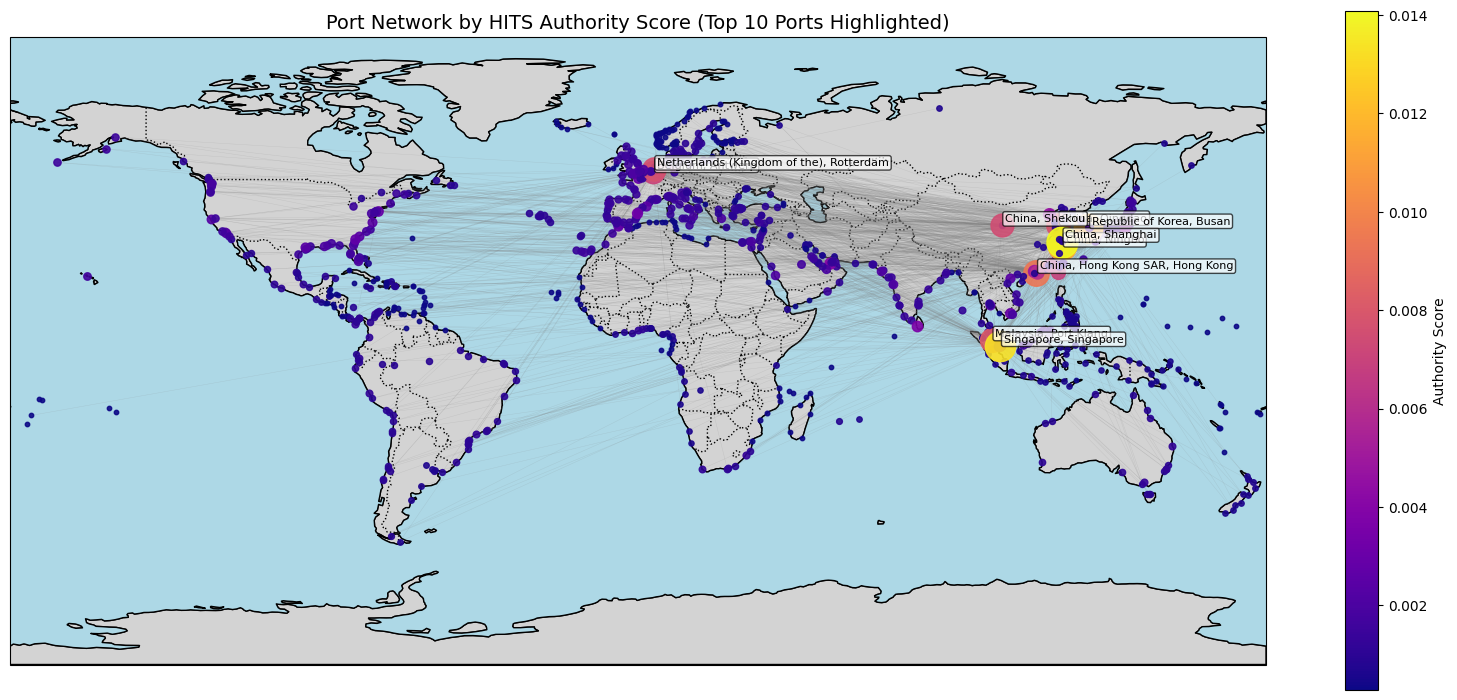

In [40]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

# Node positions
node_positions = {}
for node, data in G.nodes(data=True):
    lat = data.get('latitude')
    lon = data.get('longitude')
    if lat and lon:
        node_positions[node] = (float(lon), float(lat))

# Normalization
min_score = min(authority_scores.values())
max_score = max(authority_scores.values())

cmap = cm.plasma
norm = mcolors.Normalize(vmin=min_score, vmax=max_score)

# Size normalization
def normalize_size(val, boost=False):
    base = 10 + (val - min_score) / (max_score - min_score) * (200 - 10)
    return base * 2.5 if boost else base

# Filter edges for clarity
filtered_edges = [e for e in G.edges() if random.random() < 0.1]

# Top 10 node list
top_10_nodes = [node for node, _ in top_10_authority]

# Plot setup
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Edges
for u, v in filtered_edges:
    if u in node_positions and v in node_positions:
        lon1, lat1 = node_positions[u]
        lon2, lat2 = node_positions[v]
        ax.plot([lon1, lon2], [lat1, lat2], color='gray', linewidth=0.3, alpha=0.2)

# Nodes
for node, (lon, lat) in node_positions.items():
    score = authority_scores.get(node, 0)
    boost = node in top_10_nodes
    ax.scatter(
        lon, lat,
        s=normalize_size(score, boost=boost),
        color=cmap(norm(score)),
        alpha=0.9,
        transform=ccrs.PlateCarree(),
        zorder=5
    )

    if boost:
        ax.text(
            lon + 1, lat + 1, node,
            fontsize=8,
            transform=ccrs.PlateCarree(),
            zorder=6,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7)
        )

# Colorbar and title
plt.title("Port Network by HITS Authority Score (Top 10 Ports Highlighted)", fontsize=14)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Authority Score', fontsize=10)

plt.tight_layout()
plt.show()
